In [1]:
import os, pandas as pd, numpy as np
import ROOT
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

Welcome to JupyROOT 6.22/02


In [4]:
def display_track_scatterplot(tfile_tdaq, event_index):
    tfile_path = '/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/' + str(tfile_tdaq) + '.root'
    data_run = ROOT.TFile(tfile_path)
    
    reco_tree = data_run.Get('RECOdata')
    
    micom1 = -10.990702845870967
    micom2 = -0.6230715372388512
    micom3 = -14.775851810120347
    mm0x = 0.16200300477374738
    mm0y = -0.07188037854438818
    mm1x = -0.05921837693965215
    mm1y = -0.09816501082135087
    mm2x = 0.06484276816637088
    mm2y = -0.008958339912773188
    dwc0x = 0.16247327004382453
    dwc0y = -0.2269737482832313
    
    counter = 0
    track_list = []
    
    for event in reco_tree:

        if (len(event.Chamber1_position) == 0 or len(event.Chamber2_position) == 0 or 
            len(event.Mimosa0_xPosition) == 0 or len(event.Mimosa1_xPosition) == 0 or 
            len(event.Mimosa2_xPosition) == 0) or len(event.DWC0_xPosition) == 0:
            counter += 1
            continue


        track = []
        track.append(list(zip([x-mm0x for x in event.Mimosa0_xPosition], [x-mm0y for x in event.Mimosa0_yPosition])))
        track.append(list(zip([x-mm1x for x in event.Mimosa1_xPosition], [x-mm1y for x in event.Mimosa1_yPosition])))
        track.append(list(zip([x-mm2x for x in event.Mimosa2_xPosition], [x-mm2y for x in event.Mimosa2_yPosition])))

        track.append(list(zip([x-dwc0x for x in event.DWC0_xPosition], [x-dwc0y for x in event.DWC0_yPosition])))

        track.append(list([x-micom1 for x in event.Chamber1_position]))
        track.append(list([x-micom2 for x in event.Chamber2_position]))
        track.append(counter)
        track_list.append(track)

        counter += 1
      
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111)
    ax1.scatter(*zip(*track_list[event_index][0]), c='r')
    ax1.scatter(*zip(*track_list[event_index][1]), c='g')
    ax1.scatter(*zip(*track_list[event_index][2]), c='b')
    ax1.scatter(*zip(*track_list[event_index][3]), c='y')
        #ax1.scatter(*zip(*track_list[i][4]), c='black')
        #ax1.scatter(*zip(*track_list[i][5]), c='brown')

    
    

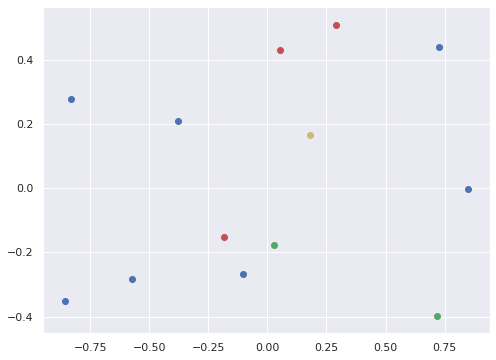

In [5]:
display_track_scatterplot(1572100097, 0)

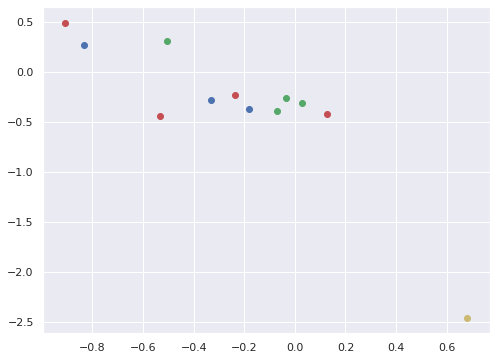

In [6]:
display_track_scatterplot(1572100629, 0)

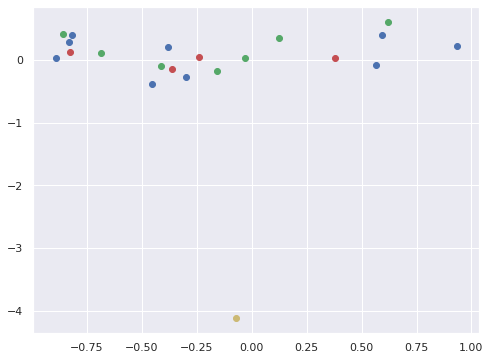

In [7]:
display_track_scatterplot(1572101077, 0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


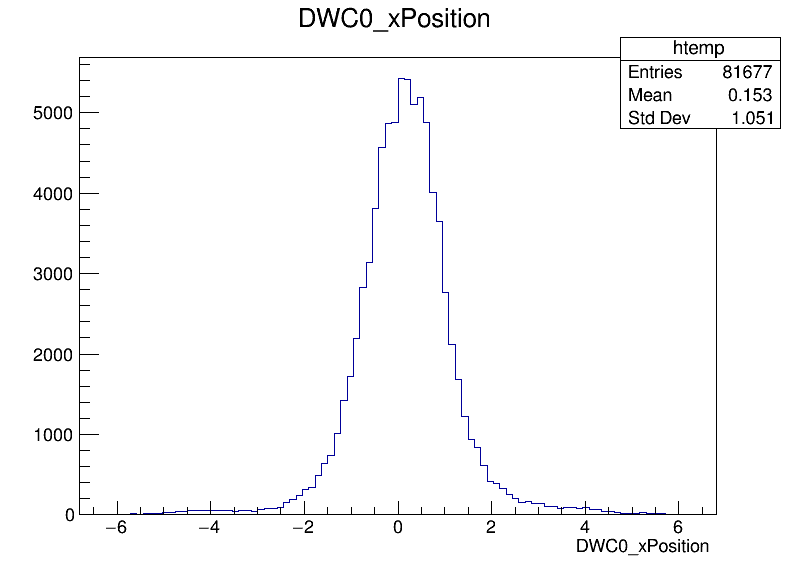

In [53]:
c = ROOT.TCanvas('c', 'c', 800, 600)
qdc1 = align220.Get('RECOdata')
qdc1.Draw('DWC0_xPosition')#, 'Mimosa1_yPosition>-.4&&Mimosa1_yPosition<.4')
c.Draw()
